In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
crime = pd.read_hdf('crime.h5', 'crime') 
crime.head()

,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,REPORTED_DATE,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
0,traffic-accident-dui-duid,traffic-accident,2014-06-29 02:01:00,-105.000149,39.745753,cbd,0,1
1,vehicular-eluding-no-chase,all-other-crimes,2014-06-29 01:54:00,-104.884660,39.738702,east-colfax,1,0
2,disturbing-the-peace,public-disorder,2014-06-29 02:00:00,-105.020719,39.706674,athmar-park,1,0
3,curfew,public-disorder,2014-06-29 02:18:00,-105.001552,39.769505,sunnyside,1,0
4,aggravated-assault,aggravated-assault,2014-06-29 04:17:00,-105.018557,39.679229,college-view-south-platte,1,0


In [3]:
wd_counts = crime['REPORTED_DATE'].dt.weekday_name.value_counts() 
wd_counts

Monday       70024
Friday       69621
Wednesday    69538
Thursday     69287
Tuesday      68394
Saturday     58834
Sunday       55213
Name: REPORTED_DATE, dtype: int64

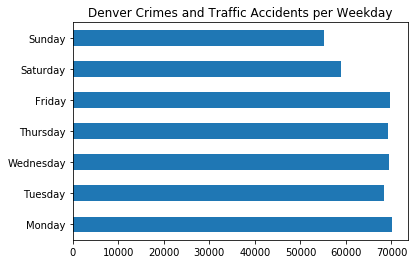

In [4]:
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 
        'Friday', 'Saturday', 'Sunday'] 
title = 'Denver Crimes and Traffic Accidents per Weekday'
wd_counts.reindex(days).plot(kind='barh', title=title)

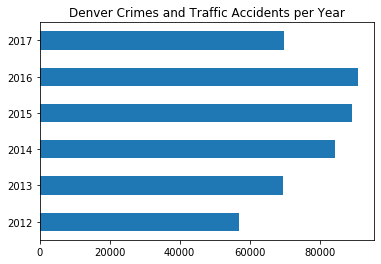

In [8]:
title = 'Denver Crimes and Traffic Accidents per Year' 
crime['REPORTED_DATE'].dt.year.value_counts() \
                        .sort_index() \
                        .plot(kind='barh', title=title)

In [10]:
weekday = crime['REPORTED_DATE'].dt.weekday_name 
year = crime['REPORTED_DATE'].dt.year

crime_wd_y = crime.groupby([year, weekday]).size() 
crime_wd_y.head(10) 

REPORTED_DATE  REPORTED_DATE
2012           Friday            8549
               Monday            8786
               Saturday          7442
               Sunday            7189
               Thursday          8440
               Tuesday           8191
               Wednesday         8440
2013           Friday           10380
               Monday           10627
               Saturday          8875
dtype: int64

In [11]:
crime_table = crime_wd_y.rename_axis(['Year', 'Weekday']).unstack('Weekday') 
crime_table

Weekday,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
Year,,,,,,,
2012,8549,8786,7442,7189,8440,8191,8440
2013,10380,10627,8875,8444,10431,10416,10354
2014,12683,12813,10950,10278,12309,12440,12948
2015,13273,13452,11586,10624,13512,13381,13320
2016,14059,13708,11467,10554,14050,13338,13900
2017,10677,10638,8514,8124,10545,10628,10576


In [12]:
criteria = crime['REPORTED_DATE'].dt.year == 2017 
crime.loc[criteria, 'REPORTED_DATE'].dt.dayofyear.max()

272

In [13]:
round(272 / 365, 3)

0.745

In [15]:
crime_pct = crime['REPORTED_DATE'].dt.dayofyear.le(272) \
                    .groupby(year) \
                    .mean() \
                    .round(3) 
crime_pct

REPORTED_DATE
2012    0.748
2013    0.725
2014    0.751
2015    0.748
2016    0.752
2017    1.000
Name: REPORTED_DATE, dtype: float64

In [16]:
crime_pct.loc[2012:2016].median()

0.748

In [17]:
crime_table.loc[2017] = crime_table.loc[2017].div(.748).astype('int') 
crime_table = crime_table.reindex(columns=days) 
crime_table

Weekday,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
Year,,,,,,,
2012,8786,8191,8440,8440,8549,7442,7189
2013,10627,10416,10354,10431,10380,8875,8444
2014,12813,12440,12948,12309,12683,10950,10278
2015,13452,13381,13320,13512,13273,11586,10624
2016,13708,13338,13900,14050,14059,11467,10554
2017,14221,14208,14139,14097,14274,11382,10860


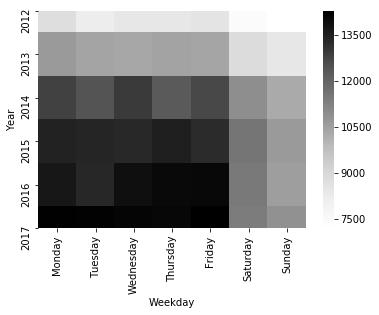

In [18]:
import seaborn as sns 
sns.heatmap(crime_table, cmap='Greys')